In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import folium # map rendering library


### I searched google for Seattle population by zip code or neighborhood, and found the needed information from two websites, one of them is in the format of web table, the other is downloadable excel file, so here is the steps to scape the data.

In [2]:
# Read table from url
d1 = pd.read_html('http://zipatlas.com/us/wa/seattle/zip-code-comparison/population-density.htm')
len(d1)

14

In [3]:
# After a few tries, found that the table is the 11th in the list
seattle_r1 = d1[-3]
seattle_r1

,0,1,2,3,4,5,6
0,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
1,1.,98174,"47.604569, -122.335359","Seattle, Washington",180,50978.44,#50
2,2.,98121,"47.614743, -122.345855","Seattle, Washington",8558,17894.56,#250
3,3.,98104,"47.601701, -122.327670","Seattle, Washington",13095,17156.75,#267
4,4.,98101,"47.610198, -122.334555","Seattle, Washington",9010,16603.32,#285
5,5.,98102,"47.634416, -122.321561","Seattle, Washington",19424,14594.02,#344
6,6.,98122,"47.610445, -122.302983","Seattle, Washington",28790,12332.03,#440
7,7.,98105,"47.662129, -122.296786","Seattle, Washington",38963,9393.63,#650
8,8.,98107,"47.668104, -122.377023","Seattle, Washington",18516,8571.51,#736
9,9.,98103,"47.678255, -122.338152","Seattle, Washington",41971,8324.30,#773


In [4]:
# Use the first row for header, first column as index

seattle_r1.columns = seattle_r1.iloc[0]
seattle_r1 = seattle_r1.loc[1:, :]
seattle_r1.set_index('#', inplace=True)

# Drop the 'City', 'National Rank' columns
seattle_r1.drop(columns=['City', 'National Rank'], inplace=True)

seattle_r1.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Zip Code,Location,Population,People / Sq. Mile
#,,,,
1.,98174,"47.604569, -122.335359",180,50978.44
2.,98121,"47.614743, -122.345855",8558,17894.56
3.,98104,"47.601701, -122.327670",13095,17156.75
4.,98101,"47.610198, -122.334555",9010,16603.32
5.,98102,"47.634416, -122.321561",19424,14594.02


In [5]:
seattle_r1.sort_values(by='Zip Code', inplace=True, ignore_index=True)
seattle_r1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Zip Code,Location,Population,People / Sq. Mile
0,98101,"47.610198, -122.334555",9010,16603.32
1,98102,"47.634416, -122.321561",19424,14594.02
2,98103,"47.678255, -122.338152",41971,8324.30
3,98104,"47.601701, -122.327670",13095,17156.75
4,98105,"47.662129, -122.296786",38963,9393.63


In [6]:
# Read in the excel table
seattle_r2 = pd.read_excel('SubRegZipCityNeighborhood.xls', header=1)
seattle_r2

,ZIP,City Name,Sub Region,Seattle Neighborhood,Unnamed: 4,ZIP.1,Sub Region.1,Seattle Neighborhood.1,Unnamed: 8,ZIP.2,City Name.1,Sub Region.2,Seattle Neighborhood.2
0,98001,Auburn,South Urban,NaN,NaN,98014,East Rural,NaN,NaN,98107,Seattle,Seattle,Ballard
1,98002,Auburn,South Urban,NaN,NaN,98019,East Rural,NaN,NaN,98117,Seattle,Seattle,Ballard
2,98003,Federal Way,South Urban,NaN,NaN,98024,East Rural,NaN,NaN,98102,Seattle,Seattle,Capitol Hill
3,98004,Bellevue,East Urban,NaN,NaN,98045,East Rural,NaN,NaN,98112,Seattle,Seattle,Capitol Hill
4,98005,Bellevue,East Urban,NaN,NaN,98050,East Rural,NaN,NaN,98122,Seattle,Seattle,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,98199,Seattle,Seattle,Queen Anne/Magnolia,NaN,98190,South Urban,NaN,NaN,98198,Des Moines,South Urban,NaN
116,98224,Baring,East Rural,NaN,NaN,98198,South Urban,NaN,NaN,98224,Baring,East Rural,NaN
117,98251,Gold Bar,East Rural,NaN,NaN,98354,South Urban,NaN,NaN,98251,Gold Bar,East Rural,NaN
118,98288,Skykomish,East Rural,NaN,NaN,98013,Vashon Island,NaN,NaN,98288,Skykomish,East Rural,NaN


The data is actually same content sort by three different features, so only the first 4 columns are needed

In [7]:
# Keep the needed columns
seattle_r2= seattle_r2.loc[:, ('ZIP', 'City Name', 'Sub Region', 'Seattle Neighborhood')]
seattle_r2

,ZIP,City Name,Sub Region,Seattle Neighborhood
0,98001,Auburn,South Urban,NaN
1,98002,Auburn,South Urban,NaN
2,98003,Federal Way,South Urban,NaN
3,98004,Bellevue,East Urban,NaN
4,98005,Bellevue,East Urban,NaN
...,...,...,...,...
115,98199,Seattle,Seattle,Queen Anne/Magnolia
116,98224,Baring,East Rural,NaN
117,98251,Gold Bar,East Rural,NaN
118,98288,Skykomish,East Rural,NaN


In [8]:
# Keep only the Seattle city
seattle_r2 = seattle_r2[seattle_r2['City Name']=='Seattle']
seattle_r2.reset_index(drop=True, inplace=True)

seattle_r2

,ZIP,City Name,Sub Region,Seattle Neighborhood
0,98101,Seattle,Seattle,Downtown
1,98102,Seattle,Seattle,Capitol Hill
2,98103,Seattle,Seattle,Lake Union
3,98104,Seattle,Seattle,Downtown
4,98105,Seattle,Seattle,Northeast
5,98106,Seattle,Seattle,Delridge
6,98107,Seattle,Seattle,Ballard
7,98108,Seattle,Seattle,Duwamish
8,98109,Seattle,Seattle,Queen Anne/Magnolia
9,98111,Seattle,Seattle,Downtown


In [9]:
# Rename columns as Zip Code, City, Sub Region, Neighborhood
seattle_r2.columns = ['Zip Code', 'City', 'Sub Region', 'Neighborhood']

# Set 'Neighborhood' equals to "Sub Reagion" if "Neighborhood" value is Nan
seattle_r2.loc[seattle_r2.isnull().any(axis=1), 'Neighborhood'] = seattle_r2.loc[seattle_r2.isnull().any(axis=1), 'Sub Region']

# Drop City, Sub Region column
seattle_r2.drop(columns=['City', 'Sub Region'], inplace=True)

seattle_r2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Zip Code,Neighborhood
0,98101,Downtown
1,98102,Capitol Hill
2,98103,Lake Union
3,98104,Downtown
4,98105,Northeast
5,98106,Delridge
6,98107,Ballard
7,98108,Duwamish
8,98109,Queen Anne/Magnolia
9,98111,Downtown


In [10]:
seattle_r2['Zip Code'] = seattle_r2['Zip Code'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
seattle_r2.dtypes

Zip Code        object
Neighborhood    object
dtype: object

In [12]:
seattle_r2.sort_values(by='Zip Code', inplace=True, ignore_index=True)
seattle_r2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Zip Code,Neighborhood
0,98101,Downtown
1,98102,Capitol Hill
2,98103,Lake Union
3,98104,Downtown
4,98105,Northeast


In [13]:
# Merge the two tables

seattle_df = pd.merge(seattle_r1, seattle_r2, how = 'left', on='Zip Code')
seattle_df

,Zip Code,Location,Population,People / Sq. Mile,Neighborhood
0,98101,"47.610198, -122.334555",9010,16603.32,Downtown
1,98102,"47.634416, -122.321561",19424,14594.02,Capitol Hill
2,98103,"47.678255, -122.338152",41971,8324.30,Lake Union
3,98104,"47.601701, -122.327670",13095,17156.75,Downtown
4,98105,"47.662129, -122.296786",38963,9393.63,Northeast
5,98106,"47.546745, -122.349900",23317,4434.17,Delridge
6,98107,"47.668104, -122.377023",18516,8571.51,Ballard
7,98108,"47.534868, -122.305792",21223,2763.51,Duwamish
8,98109,"47.630798, -122.345752",16018,8016.31,Queen Anne/Magnolia
9,98112,"47.632236, -122.296766",20480,6578.03,Capitol Hill


### A few neighborhood missing here, I could not  found any website to scrape from, luckily there is only 9 of missing values, so I could google them and filled in manually.

In [14]:
zip_dict = {'98133': 'Bitter Lake', '98148': 'Five Corners', '98155': 'Shoreline', '98166':'Burien', '98168':'Riverton-Boulevard Park',
            '98177':'The Highlands', '98178': 'Rainier Beach', '98188':'McMicken Heights', '98198' :'North Hill'}

for key in zip_dict.keys():
    seattle_df.loc[seattle_df['Zip Code']==key, 'Neighborhood'] = zip_dict[key]

seattle_df

,Zip Code,Location,Population,People / Sq. Mile,Neighborhood
0,98101,"47.610198, -122.334555",9010,16603.32,Downtown
1,98102,"47.634416, -122.321561",19424,14594.02,Capitol Hill
2,98103,"47.678255, -122.338152",41971,8324.30,Lake Union
3,98104,"47.601701, -122.327670",13095,17156.75,Downtown
4,98105,"47.662129, -122.296786",38963,9393.63,Northeast
5,98106,"47.546745, -122.349900",23317,4434.17,Delridge
6,98107,"47.668104, -122.377023",18516,8571.51,Ballard
7,98108,"47.534868, -122.305792",21223,2763.51,Duwamish
8,98109,"47.630798, -122.345752",16018,8016.31,Queen Anne/Magnolia
9,98112,"47.632236, -122.296766",20480,6578.03,Capitol Hill


In [15]:
# Split the 'Location' column into 'Latitude' and 'Longitude'
new = seattle_df["Location"].str.split(",", n = 1, expand = True)
seattle_df['Latitude'] = new[0]
seattle_df['Longitude'] = new[1]
seattle_df.drop(columns=['Location'], inplace=True)
seattle_df

,Zip Code,Population,People / Sq. Mile,Neighborhood,Latitude,Longitude
0,98101,9010,16603.32,Downtown,47.610198,-122.334555
1,98102,19424,14594.02,Capitol Hill,47.634416,-122.321561
2,98103,41971,8324.30,Lake Union,47.678255,-122.338152
3,98104,13095,17156.75,Downtown,47.601701,-122.327670
4,98105,38963,9393.63,Northeast,47.662129,-122.296786
5,98106,23317,4434.17,Delridge,47.546745,-122.349900
6,98107,18516,8571.51,Ballard,47.668104,-122.377023
7,98108,21223,2763.51,Duwamish,47.534868,-122.305792
8,98109,16018,8016.31,Queen Anne/Magnolia,47.630798,-122.345752
9,98112,20480,6578.03,Capitol Hill,47.632236,-122.296766


In [92]:
# The latitude and longitude of 98166 from above is actually not accurate, I found out in later steps, so a manual update is carried out
seattle_df.loc[28, ['Latitude', 'Longitude']] = ['47.4475', '-122.3567']

In [137]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

# add markers to map
for lat, lng, label in zip(seattle_df['Latitude'], seattle_df['Longitude'], seattle_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [141]:
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20200328' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxx
CLIENT_SECRET:xxxx


In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



In [94]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Zip Code Latitude', 
                  'Zip Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
seattle_venues = getNearbyVenues(names=seattle_df['Zip Code'],
                                   latitudes=seattle_df['Latitude'],
                                   longitudes=seattle_df['Longitude']
                                  )

98101
98102
98103
98104
98105
98106
98107
98108
98109
98112
98115
98116
98117
98118
98119
98121
98122
98125
98126
98133
98134
98136
98144
98146
98148
98154
98155
98164
98166
98168
98174
98177
98178
98188
98198
98199


In [96]:
print(seattle_venues.shape)
seattle_venues.head()

(1038, 7)


,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,98101,47.610198,-122.334555,The 5th Avenue Theatre,47.608996,-122.334162,Theater
1,98101,47.610198,-122.334555,Monorail Espresso,47.610828,-122.335048,Coffee Shop
2,98101,47.610198,-122.334555,ACT Theatre,47.610763,-122.332905,Theater
3,98101,47.610198,-122.334555,Veggie Grill,47.610058,-122.336497,Vegetarian / Vegan Restaurant
4,98101,47.610198,-122.334555,MOD Pizza,47.609490,-122.332647,Pizza Place


In [97]:
seattle_venues.to_csv('seattle_venues.csv')

In [99]:
# Convert all value in 'Venue Category' that contains the word 'Restaurant' into 'Restaurant'
seattle_venues.loc[seattle_venues['Venue Category'].str.contains('Restaurant'), 'Venue Category' ] = 'Restaurant'

In [100]:
seattle_venues.groupby('Zip Code').count()

,Zip Code Latitude,Zip Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip Code,,,,,,
98101,100,100,100,100,100,100
98102,16,16,16,16,16,16
98103,10,10,10,10,10,10
98104,97,97,97,97,97,97
98105,87,87,87,87,87,87
98106,1,1,1,1,1,1
98107,71,71,71,71,71,71
98108,15,15,15,15,15,15
98109,29,29,29,29,29,29


In [101]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 198 uniques categories.


In [102]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Zip Code'] = seattle_venues['Zip Code'] 

# move zip code column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Zip Code,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,Animal Shelter,Antique Shop,Art Gallery,...,Tram Station,Video Game Store,Video Store,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,98101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
seattle_grouped = seattle_onehot.groupby('Zip Code').mean().reset_index()
seattle_grouped

,Zip Code,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,Animal Shelter,Antique Shop,Art Gallery,...,Tram Station,Video Game Store,Video Store,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,98101,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.01,0.020000,0.010000
1,98102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
2,98103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
3,98104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020619,...,0.00,0.010309,0.000000,0.000000,0.00,0.00,0.010309,0.00,0.000000,0.010309
4,98105,0.011494,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.057471,0.000000
5,98106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
6,98107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.014085,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
7,98108,0.000000,0.000000,0.133333,0.066667,0.066667,0.333333,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
8,98109,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
9,98112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000


## Option 1: Choose the area with highest restaraunts frequencs, and preferrably with higher population density.

In [109]:
top_resturant_area = seattle_grouped[['Zip Code', 'Restaurant']].sort_values(by='Restaurant', ascending=False)
top_resturant_area.merge(seattle_df, on='Zip Code').head()

,Zip Code,Restaurant,Population,People / Sq. Mile,Neighborhood,Latitude,Longitude
0,98133,0.400000,42896,6041.66,Bitter Lake,47.740091,-122.342761
1,98118,0.333333,40791,6697.19,Southeast,47.539965,-122.274722
2,98121,0.260000,8558,17894.56,Downtown,47.614743,-122.345855
3,98154,0.260000,1,283.15,Downtown,47.606211,-122.333792
4,98115,0.250000,43567,6603.13,Northeast,47.685766,-122.292178


### Option 1 solution: In the Bitter Lake area, with zip code 98133, there is highest resturants frequency, and higher population density, so it would be a nice place to open a resturant.

## Option 2: If 98133 is not a acceptable place for a new restuarant, select an area that is similar to it.

In [110]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zip_code_venues_sorted = pd.DataFrame(columns=columns)
zip_code_venues_sorted['Zip Code'] = seattle_grouped['Zip Code']

for ind in np.arange(seattle_grouped.shape[0]):
    zip_code_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

zip_code_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98101,Restaurant,Coffee Shop,Hotel,Clothing Store,Cosmetics Shop,Theater,Spa,Café,Cocktail Bar,Performing Arts Venue
1,98102,Restaurant,Trail,Gym,Garden,Outdoor Sculpture,Dog Run,Memorial Site,Cemetery,Bakery,Gym / Fitness Center
2,98103,Park,Tennis Court,Trail,Theater,Pier,Beach,Lake,Dive Bar,Dog Run,Donut Shop
3,98104,Restaurant,Coffee Shop,Cocktail Bar,Café,Bakery,Hotel,Salad Place,Bubble Tea Shop,Poke Place,Art Gallery
4,98105,Restaurant,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Cosmetics Shop,Arts & Crafts Store,Pizza Place,Mobile Phone Shop,Electronics Store


In [111]:
zip_code_venues_sorted


,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,98101,Restaurant,Coffee Shop,Hotel,Clothing Store,Cosmetics Shop,Theater,Spa,Café,Cocktail Bar,Performing Arts Venue
1,98102,Restaurant,Trail,Gym,Garden,Outdoor Sculpture,Dog Run,Memorial Site,Cemetery,Bakery,Gym / Fitness Center
2,98103,Park,Tennis Court,Trail,Theater,Pier,Beach,Lake,Dive Bar,Dog Run,Donut Shop
3,98104,Restaurant,Coffee Shop,Cocktail Bar,Café,Bakery,Hotel,Salad Place,Bubble Tea Shop,Poke Place,Art Gallery
4,98105,Restaurant,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Cosmetics Shop,Arts & Crafts Store,Pizza Place,Mobile Phone Shop,Electronics Store
5,98106,Bakery,Yoga Studio,Dog Run,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Farm,Fabric Shop,Event Space
6,98107,Restaurant,Coffee Shop,Brewery,Bar,Thrift / Vintage Store,Food Truck,Pet Store,Sandwich Place,Gaming Cafe,Automotive Shop
7,98108,Airport Terminal,Airport,Miscellaneous Shop,Rental Car Location,Electronics Store,Office,Restaurant,Café,Airport Service,Airport Lounge
8,98109,Coffee Shop,Restaurant,Bus Stop,Gym,Park,IT Services,Gym / Fitness Center,Juice Bar,Donut Shop,Physical Therapist
9,98112,Garden,Park,Tea Room,Scenic Lookout,Discount Store,Fish & Chips Shop,Farm,Fabric Shop,Event Space,Electronics Store


In [124]:
seattle_grouped_clustering = seattle_grouped.drop('Zip Code', 1)

### Now that the data is ready, use KMeans clustering to find out which cluster does the area 98133 falls in, and any other area in the same cluster should also be a good place for restuarants. But first, use Elbow method to find out the best K.

In [120]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(seattle_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
    

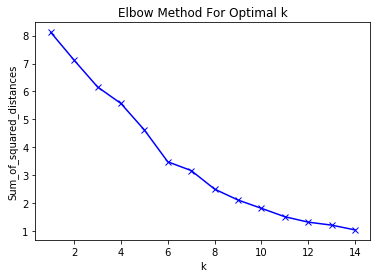

In [122]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [125]:
# Apparently, 8 seems to be the best K, so set number of clusters
kclusters = 8



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 4, 1, 7, 1, 2, 1, 7, 1, 6, 1, 0])

In [126]:
# add clustering labels
zip_code_venues_sorted['Cluster Labels'] = kmeans.labels_

seattle_merged = seattle_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(zip_code_venues_sorted.set_index('Zip Code'), on='Zip Code')
seattle_merged.dropna(inplace=True)

seattle_merged

,Zip Code,Population,People / Sq. Mile,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,98101,9010,16603.32,Downtown,47.610198,-122.334555,Restaurant,Coffee Shop,Hotel,Clothing Store,Cosmetics Shop,Theater,Spa,Café,Cocktail Bar,Performing Arts Venue,1.0
1,98102,19424,14594.02,Capitol Hill,47.634416,-122.321561,Restaurant,Trail,Gym,Garden,Outdoor Sculpture,Dog Run,Memorial Site,Cemetery,Bakery,Gym / Fitness Center,1.0
2,98103,41971,8324.30,Lake Union,47.678255,-122.338152,Park,Tennis Court,Trail,Theater,Pier,Beach,Lake,Dive Bar,Dog Run,Donut Shop,0.0
3,98104,13095,17156.75,Downtown,47.601701,-122.327670,Restaurant,Coffee Shop,Cocktail Bar,Café,Bakery,Hotel,Salad Place,Bubble Tea Shop,Poke Place,Art Gallery,1.0
4,98105,38963,9393.63,Northeast,47.662129,-122.296786,Restaurant,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Cosmetics Shop,Arts & Crafts Store,Pizza Place,Mobile Phone Shop,Electronics Store,1.0
5,98106,23317,4434.17,Delridge,47.546745,-122.349900,Bakery,Yoga Studio,Dog Run,Food Court,Food & Drink Shop,Fish Market,Fish & Chips Shop,Farm,Fabric Shop,Event Space,5.0
6,98107,18516,8571.51,Ballard,47.668104,-122.377023,Restaurant,Coffee Shop,Brewery,Bar,Thrift / Vintage Store,Food Truck,Pet Store,Sandwich Place,Gaming Cafe,Automotive Shop,1.0
7,98108,21223,2763.51,Duwamish,47.534868,-122.305792,Airport Terminal,Airport,Miscellaneous Shop,Rental Car Location,Electronics Store,Office,Restaurant,Café,Airport Service,Airport Lounge,1.0
8,98109,16018,8016.31,Queen Anne/Magnolia,47.630798,-122.345752,Coffee Shop,Restaurant,Bus Stop,Gym,Park,IT Services,Gym / Fitness Center,Juice Bar,Donut Shop,Physical Therapist,1.0
9,98112,20480,6578.03,Capitol Hill,47.632236,-122.296766,Garden,Park,Tea Room,Scenic Lookout,Discount Store,Fish & Chips Shop,Farm,Fabric Shop,Event Space,Electronics Store,1.0


### There are two rows that only contain NaN value in the above data frame, after checking them individually, I found that the longitude and latitude value for 98166 is not accurate, after the update, the results became normal. But the 98168 is still NaN, after looking it up on google map, I found that it is a private club area, prabably that is why there is no info from the Foursquare request, so I had to drop the row.

In [132]:
# The lable of 98133
optimal_cluster = seattle_merged.loc[seattle_merged['Zip Code']=='98133', 'Cluster Labels'].values[0]
optimal_cluster

1.0

In [140]:
optimal_rest_area = seattle_merged.loc[seattle_merged['Cluster Labels']== 1]
optimal_rest_area.reset_index()

,index,Zip Code,Population,People / Sq. Mile,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,0,98101,9010,16603.32,Downtown,47.610198,-122.334555,Restaurant,Coffee Shop,Hotel,Clothing Store,Cosmetics Shop,Theater,Spa,Café,Cocktail Bar,Performing Arts Venue,1.0
1,1,98102,19424,14594.02,Capitol Hill,47.634416,-122.321561,Restaurant,Trail,Gym,Garden,Outdoor Sculpture,Dog Run,Memorial Site,Cemetery,Bakery,Gym / Fitness Center,1.0
2,3,98104,13095,17156.75,Downtown,47.601701,-122.327670,Restaurant,Coffee Shop,Cocktail Bar,Café,Bakery,Hotel,Salad Place,Bubble Tea Shop,Poke Place,Art Gallery,1.0
3,4,98105,38963,9393.63,Northeast,47.662129,-122.296786,Restaurant,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Cosmetics Shop,Arts & Crafts Store,Pizza Place,Mobile Phone Shop,Electronics Store,1.0
4,6,98107,18516,8571.51,Ballard,47.668104,-122.377023,Restaurant,Coffee Shop,Brewery,Bar,Thrift / Vintage Store,Food Truck,Pet Store,Sandwich Place,Gaming Cafe,Automotive Shop,1.0
5,7,98108,21223,2763.51,Duwamish,47.534868,-122.305792,Airport Terminal,Airport,Miscellaneous Shop,Rental Car Location,Electronics Store,Office,Restaurant,Café,Airport Service,Airport Lounge,1.0
6,8,98109,16018,8016.31,Queen Anne/Magnolia,47.630798,-122.345752,Coffee Shop,Restaurant,Bus Stop,Gym,Park,IT Services,Gym / Fitness Center,Juice Bar,Donut Shop,Physical Therapist,1.0
7,9,98112,20480,6578.03,Capitol Hill,47.632236,-122.296766,Garden,Park,Tea Room,Scenic Lookout,Discount Store,Fish & Chips Shop,Farm,Fabric Shop,Event Space,Electronics Store,1.0
8,10,98115,43567,6603.13,Northeast,47.685766,-122.292178,Restaurant,Coffee Shop,Grocery Store,Pizza Place,Sandwich Place,Steakhouse,Supermarket,Lounge,Bank,Yoga Studio,1.0
9,12,98117,29667,7567.61,Ballard,47.687758,-122.382122,Restaurant,Food Truck,Pizza Place,Fish Market,Smoke Shop,Furniture / Home Store,Beer Bar,Mobile Phone Shop,Soccer Field,Music Store,1.0


### Option 2 Conclusion: Turns out, there are 22 area in Seattle that is quite suitable for opening restuarants, below is the map of those locations.

In [139]:
# create map
map_restuarents = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

# add markers to map
for lat, lng, label in zip(optimal_rest_area['Latitude'], optimal_rest_area['Longitude'], optimal_rest_area['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_restuarents)  
       
map_restuarents